# Day 1: Baseline Anomaly Detection

Z-score based anomaly detection for cloud cost data

## Step 1: Load data

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data/cloud_cost_daily.csv")
df["date"] = pd.to_datetime(df["date"])
df = df.sort_values("date")

print(f"Data shape: {df.shape}")
df.head()

Data shape: (9, 4)


,date,account_id,service,cost
0,2025-10-01,acct-1,EC2,45
1,2025-10-02,acct-1,EC2,47
2,2025-10-03,acct-1,EC2,46
3,2025-10-04,acct-1,EC2,48
4,2025-10-05,acct-1,EC2,150


## Step 2: Rolling statistics

In [7]:
df["rolling_mean"] = df["cost"].rolling(window=3).mean()
df["rolling_std"] = df["cost"].rolling(window=3).std()

df[["date", "cost", "rolling_mean", "rolling_std"]].head(5)

,date,cost,rolling_mean,rolling_std
0,2025-10-01,45,NaN,NaN
1,2025-10-02,47,NaN,NaN
2,2025-10-03,46,46.000000,1.000000
3,2025-10-04,48,47.000000,1.000000
4,2025-10-05,150,81.333333,59.475485


## Step 3: Z-Score anomaly detection

In [8]:
df["z_score"] = (df["cost"] - df["rolling_mean"]) / df["rolling_std"]
df["anomaly"] = df["z_score"].abs() > 2

print(f"Anomalies detected: {df['anomaly'].sum()}")
df[df["anomaly"]][["date", "cost", "z_score"]]

Anomalies detected: 0


,date,cost,z_score


## Step 4: Visualize (VERY IMPORTANT)

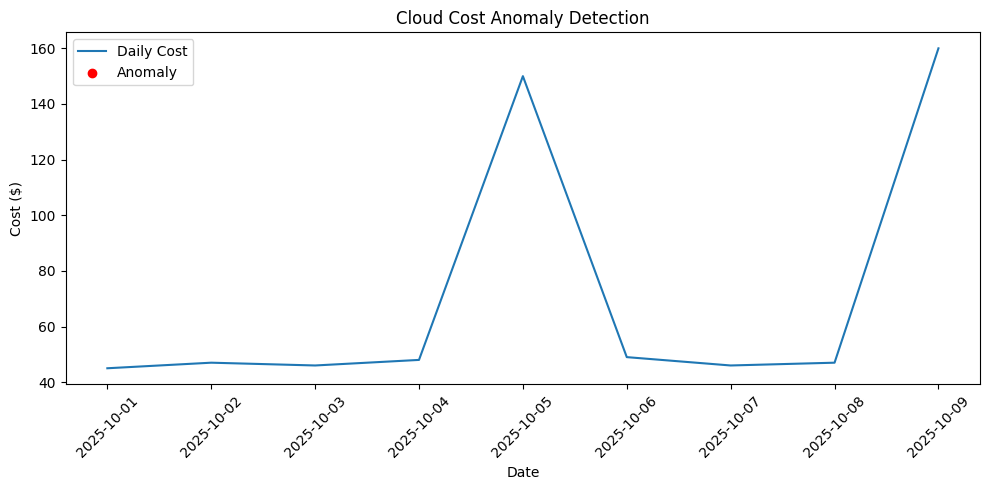

In [9]:
plt.figure(figsize=(10,5))
plt.plot(df["date"], df["cost"], label="Daily Cost")
plt.scatter(
    df[df["anomaly"]]["date"],
    df[df["anomaly"]]["cost"],
    color="red",
    label="Anomaly"
)
plt.legend()
plt.title("Cloud Cost Anomaly Detection")
plt.xlabel("Date")
plt.ylabel("Cost ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Step 5: Add Recommendation Logic

In [10]:
def recommend_action(cost):
    if cost > 120:
        return "Investigate idle EC2 instances or scale down instance size"
    return "Normal usage"

df["recommendation"] = df["cost"].apply(recommend_action)

# Show anomalies with recommendations
df[df["anomaly"]][["date", "cost", "z_score", "recommendation"]]

,date,cost,z_score,recommendation


## Baseline Metrics

In [11]:
# Basic detection stats
total_anomalies = df['anomaly'].sum()
anomaly_rate = (total_anomalies / len(df)) * 100
avg_anomaly_cost = df[df['anomaly']]['cost'].mean()
avg_normal_cost = df[~df['anomaly']]['cost'].mean()

print(f"Total anomalies: {total_anomalies}")
print(f"Anomaly rate: {anomaly_rate:.1f}%")
print(f"Average anomaly cost: ${avg_anomaly_cost:.2f}")
print(f"Average normal cost: ${avg_normal_cost:.2f}")
print(f"Cost increase factor: {avg_anomaly_cost/avg_normal_cost:.1f}x")

# Recommendation summary
if total_anomalies > 0:
    recommendations = df[df['anomaly']]['recommendation'].value_counts()
    print(f"\nRecommendations for anomalies:")
    for rec, count in recommendations.items():
        print(f"- {rec}: {count} cases")

Total anomalies: 0
Anomaly rate: 0.0%
Average anomaly cost: $nan
Average normal cost: $70.89
Cost increase factor: nanx
